# ENSEMBLES PERFORMANCE AND INTERPRETATION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import sys 

root_path = 'C://Users//HP//projects//DiplomaThesis'
sys.path.append(f'{root_path}')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [74]:
from data import Meta

In [75]:
meta = Meta()

In [77]:
meta.load()

In [ ]:
from plots import LatexFigure

In [ ]:
ar = pd.read_csv("results/args.csv", index_col=0)

In [112]:
def df_heatmap(df, scale=2):
    fig, axis = plt.subplots() # il me semble que c'est une bonne habitude de faire supbplots
    heatmap = axis.pcolor(df, cmap=plt.cm.Blues)
    labels = [meta.sc_to_latex.get(label) for label in df.index.values.tolist()]
    plt.yticks(np.arange(0.5, len(df.index), 1), labels)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    axis.invert_yaxis()
    axis.xaxis.tick_top()
    plt.colorbar(heatmap)
    fig = LatexFigure(plt.gcf())
    fig.fit(scale=scale)

# Performance

In [156]:
pe = pd.read_csv("results/performance.csv", index_col=0)

In [155]:
pe_hidden = pd.concat([ar["hidden_layers"], pe], axis=1).groupby('hidden_layers').mean().transpose()
pe_hidden

hidden_layers,32,"32,16","32,16,8","32,16,8,4","32,16,8,4,2"
train_mse,0.027909,0.028689,0.028815,0.028220,0.027207
train_root_mean_squared_error,0.159730,0.159898,0.160040,0.159902,0.159986
train_mean_absolute_error,0.095492,0.095524,0.095922,0.095137,0.095321
train_r_square,0.009873,0.007763,0.006013,0.007728,0.006686
valid_mse,0.029514,0.030300,0.030421,0.029847,0.028737
valid_root_mean_squared_error,0.164655,0.164837,0.164961,0.164891,0.164679
valid_mean_absolute_error,0.092118,0.092148,0.092562,0.091845,0.091770
valid_r_square,0.003594,0.001379,-0.000134,0.000749,0.003318
test_mse,0.021128,0.021959,0.022171,0.021390,0.020377
test_root_mean_squared_error,0.136166,0.136563,0.137085,0.136169,0.136263


In [159]:
pd.concat([ar[["ytrain", "hidden_layers"]], pe], axis=1).groupby(['hidden_layers','ytrain']).mean().transpose()

hidden_layers                        32                                \
ytrain                               12        13        14        15   
train_mse                      0.026611  0.027837  0.028668  0.028081   
train_root_mean_squared_error  0.158082  0.157952  0.161967  0.161344   
train_mean_absolute_error      0.095080  0.095671  0.096322  0.096076   
train_r_square                 0.008320  0.008225  0.010941  0.010748   
valid_mse                      0.030225  0.030938  0.029077  0.028272   
valid_root_mean_squared_error  0.169127  0.167481  0.163225  0.161936   
valid_mean_absolute_error      0.094346  0.092623  0.091341  0.091596   
valid_r_square                 0.000411  0.004484  0.005569  0.003584   
test_mse                       0.020868  0.028881  0.020226  0.016639   
test_root_mean_squared_error   0.138733  0.161225  0.133386  0.120792   
test_mean_absolute_error       0.074012  0.087476  0.082699  0.068196   
test_r_square                  0.001806  0.006320  0.007543  0.027757   

hidden_layers                               32,16                      \
ytrain                               16        12        13        14   
train_mse                      0.028349  0.028089  0.028350  0.028801   
train_root_mean_squared_error  0.159304  0.158564  0.158307  0.161904   
train_mean_absolute_error      0.094308  0.095503  0.096126  0.096501   
train_r_square                 0.011130  0.002261  0.003767  0.011711   
valid_mse                      0.029055  0.031621  0.031344  0.029331   
valid_root_mean_squared_error  0.161507  0.169337  0.167496  0.163532   
valid_mean_absolute_error      0.090682  0.094355  0.092889  0.091803   
valid_r_square                 0.003922 -0.002075  0.004303  0.001832   
test_mse                       0.019022  0.022189  0.029433  0.020355   
test_root_mean_squared_error   0.126694  0.138720  0.161691  0.133293   
test_mean_absolute_error       0.080322  0.074570  0.088038  0.082872   
test_r_square                 -0.028803  0.001994  0.000570  0.008931   

hidden_layers                                      ... 32,16,8,4            \
ytrain                               15        16  ...        12        13   
train_mse                      0.028500  0.029705  ...  0.027626  0.027903   
train_root_mean_squared_error  0.161436  0.159278  ...  0.158096  0.158099   
train_mean_absolute_error      0.094961  0.094529  ...  0.095152  0.095127   
train_r_square                 0.009623  0.011452  ...  0.008152  0.006384   
valid_mse                      0.028791  0.030414  ...  0.031211  0.031209   
valid_root_mean_squared_error  0.162335  0.161487  ...  0.169055  0.168229   
valid_mean_absolute_error      0.090776  0.090917  ...  0.094427  0.092500   
valid_r_square                -0.001331  0.004164  ...  0.001267 -0.004434   
test_mse                       0.017258  0.020561  ...  0.021877  0.029045   
test_root_mean_squared_error   0.121735  0.127379  ...  0.138727  0.161668   
test_mean_absolute_error       0.068159  0.081179  ...  0.074341  0.087114   
test_r_square                  0.012516 -0.039955  ...  0.001893  0.000847   

hidden_layers                                               32,16,8,4,2  \
ytrain                               14        15        16          12   
train_mse                      0.028997  0.028200  0.028372    0.028317   
train_root_mean_squared_error  0.162061  0.161296  0.159960    0.158096   
train_mean_absolute_error      0.095850  0.095577  0.093981    0.095519   
train_r_square                 0.009793  0.011342  0.002970    0.008148   
valid_mse                      0.029472  0.028368  0.028975    0.031805   
valid_root_mean_squared_error  0.163519  0.161816  0.161835    0.168768   
valid_mean_absolute_error      0.091053  0.091148  0.090096    0.094275   
valid_r_square                 0.001985  0.005061 -0.000132    0.004655   
test_mse                       0.020517  0.016813  0.018698    0.022662   
test_root_mean_squared_error   0.133

# Interpretation (integrated gradients, model reliance)

In [141]:
ig = pd.read_csv("results/integrated_gradients_global.csv", index_col=0)
mr = pd.read_csv("results/model_reliance.csv", index_col=0)
sorting = ig.mean().abs().sort_values(ascending=False).index.tolist()

ig = ig[sorting]
ig_hidden = pd.concat([ar["hidden_layers"], ig], axis=1).groupby('hidden_layers').mean().transpose()

mr = mr[sorting]
mr_hidden = pd.concat([ar["hidden_layers"], mr], axis=1).groupby('hidden_layers').mean().transpose()


## Average importance across time

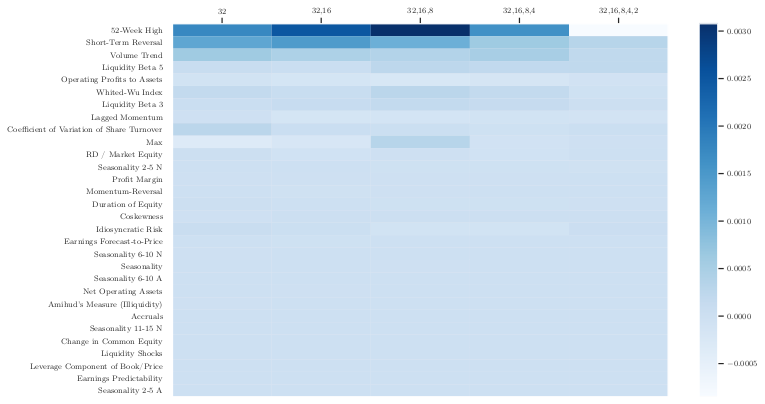

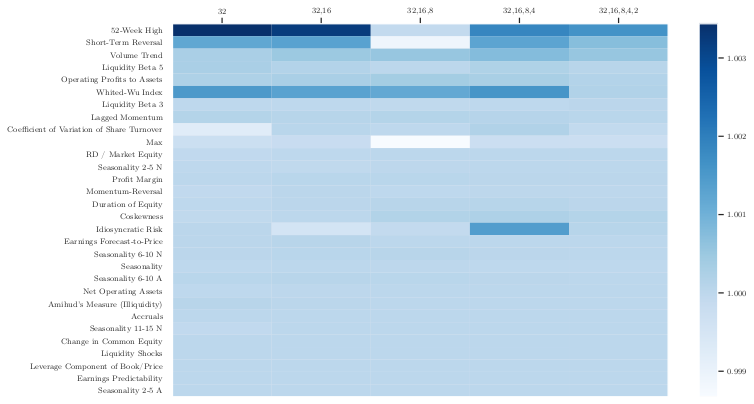

In [143]:
df_heatmap(ig_hidden)
df_heatmap(mr_hidden)

## (In)stability in time

In [142]:
ig_NN1 = pd.concat([ar[["ytrain", "hidden_layers"]], ig], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32'].transpose()
ig_NN2 = pd.concat([ar[["ytrain", "hidden_layers"]], ig], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16'].transpose()
ig_NN3 = pd.concat([ar[["ytrain", "hidden_layers"]], ig], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16,8'].transpose()
ig_NN4 = pd.concat([ar[["ytrain", "hidden_layers"]], ig], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16,8,4'].transpose()
ig_NN5 = pd.concat([ar[["ytrain", "hidden_layers"]], ig], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16,8,4,2'].transpose()

mr_NN1 = pd.concat([ar[["ytrain", "hidden_layers"]], mr], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32'].transpose()
mr_NN2 = pd.concat([ar[["ytrain", "hidden_layers"]], mr], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16'].transpose()
mr_NN3 = pd.concat([ar[["ytrain", "hidden_layers"]], mr], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16,8'].transpose()
mr_NN4 = pd.concat([ar[["ytrain", "hidden_layers"]], mr], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16,8,4'].transpose()
mr_NN5 = pd.concat([ar[["ytrain", "hidden_layers"]], mr], axis=1).groupby(['hidden_layers','ytrain']).mean().loc['32,16,8,4,2'].transpose()

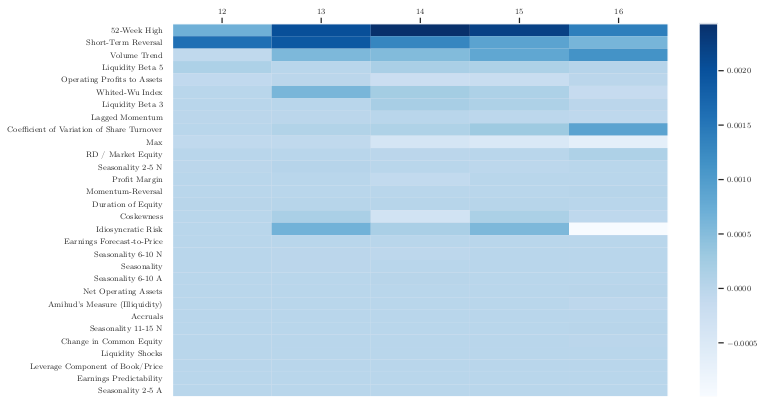

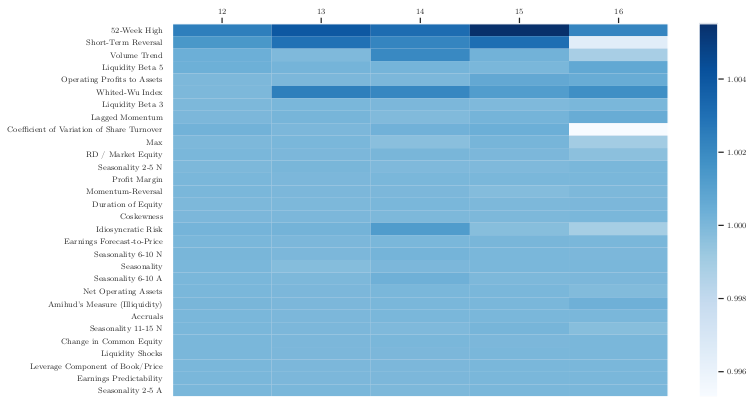

In [144]:
df_heatmap(ig_NN1)
df_heatmap(mr_NN1)

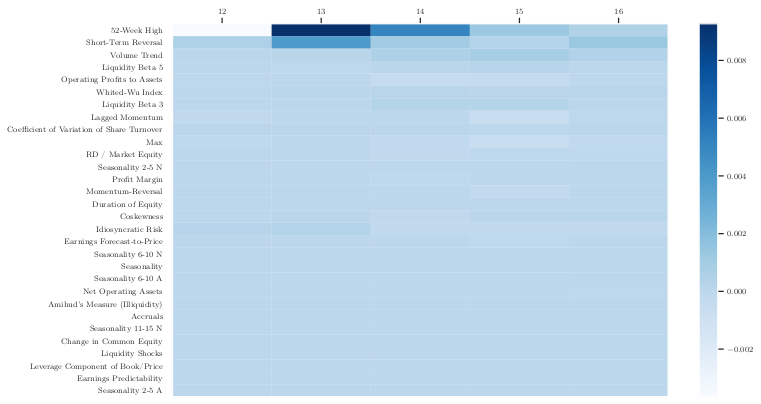

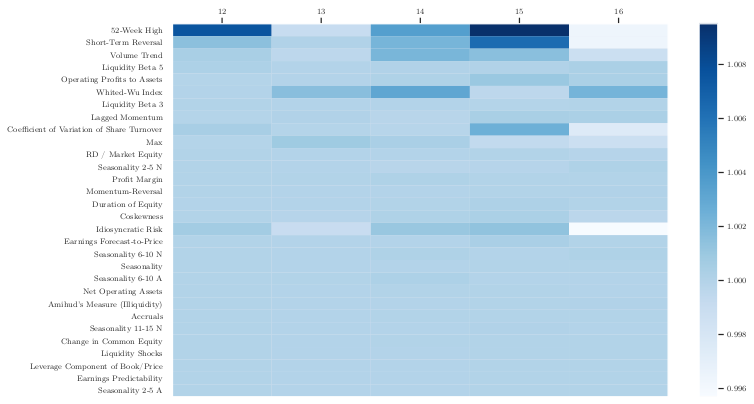

In [145]:
df_heatmap(ig_NN2)
df_heatmap(mr_NN2)

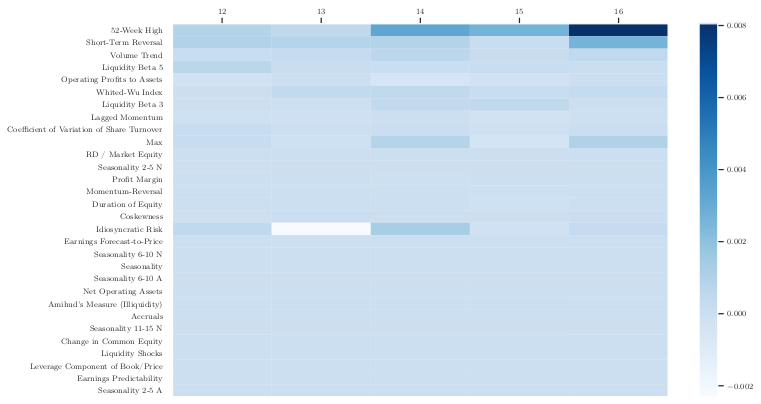

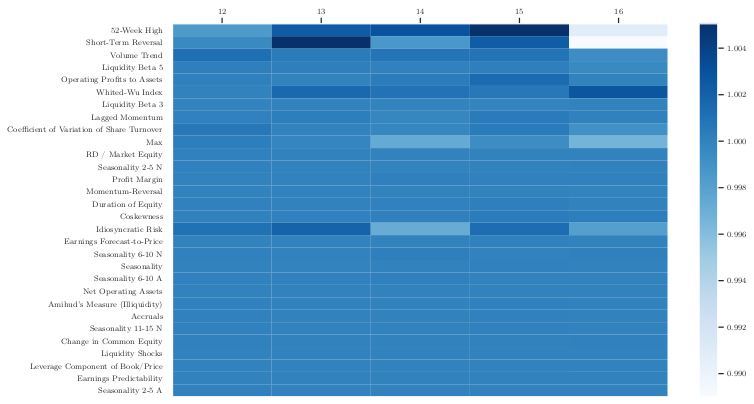

In [146]:
df_heatmap(ig_NN3)
df_heatmap(mr_NN3)

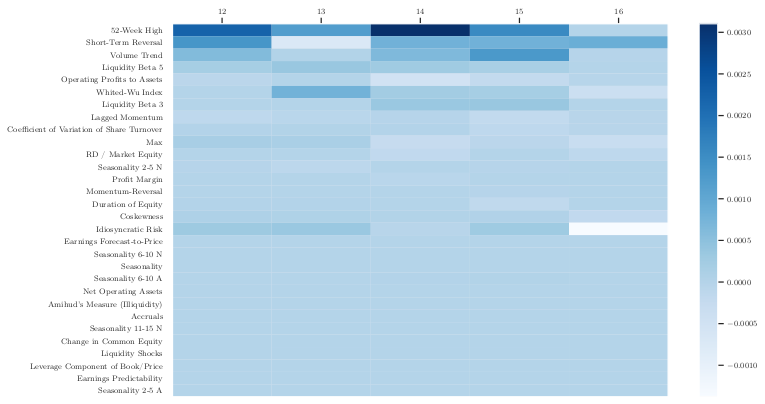

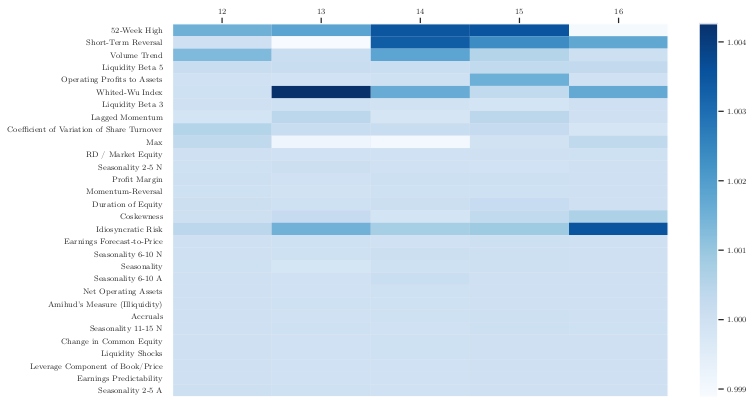

In [147]:
df_heatmap(ig_NN4)
df_heatmap(mr_NN4)

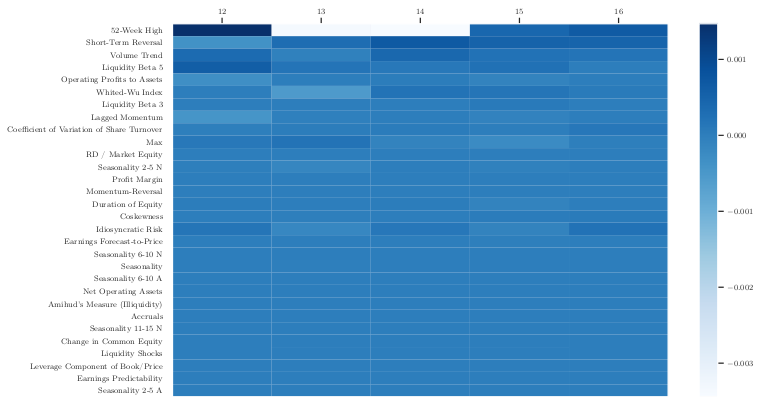

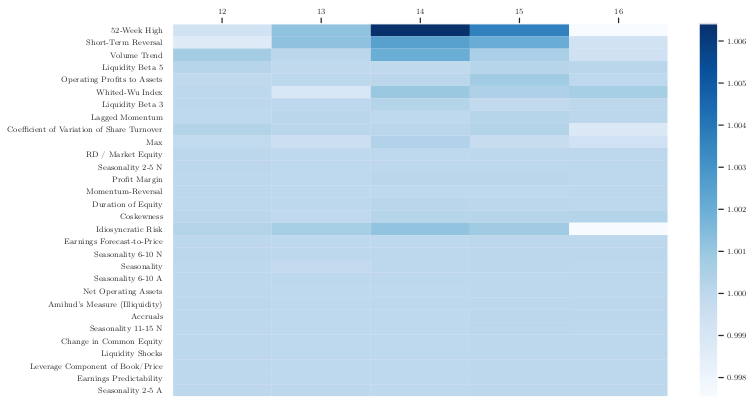

In [148]:
df_heatmap(ig_NN5)
df_heatmap(mr_NN5)